<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2021-ban7002/blob/main/Week_5_Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Lense Simple Recomender


---


MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.

This data set consists of:
* 100,000 ratings (1-5) from 943 users on 1682 movies.
* Each user has rated at least 20 movies.
* Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th,

- user_id: id of the user
- rating: 1 - 5
- movie title

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
movie = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/2023_BAN6005/main/module_4/data/movide_lens_sample.csv")
movie.head()


,movie title,user_id,rating
0,Toy Story (1995),1,5
1,Toy Story (1995),2,4
2,Toy Story (1995),6,4
3,Toy Story (1995),10,4
4,Toy Story (1995),13,3


# Distribution of Ratings

<Axes: xlabel='rating', ylabel='count'>

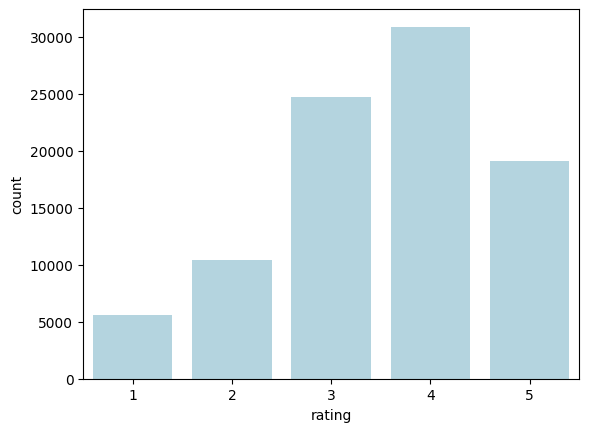

In [ ]:
sns.countplot(movie,x='rating', color='lightblue')

In [ ]:
res = movie.groupby('movie title')[["rating"]].agg(['mean','count']).reset_index()
res.columns = ['movie_title','rating_mean','rating_count']
res.nlargest(10,'rating_mean').reset_index()

,index,movie_title,rating_mean,rating_count
0,30,Aiqing wansui (1994),5.0,1
1,632,"Great Day in Harlem, A (1994)",5.0,1
2,869,Little City (1998),5.0,1
3,943,Marlene Dietrich: Shadow and Light (1996),5.0,1
4,1171,Prefontaine (1997),5.0,3
5,1272,"Saint of Fort Washington, The (1993)",5.0,2
6,1276,Santa with Muscles (1996),5.0,2
7,1358,Someone Else's America (1995),5.0,1
8,1386,Star Kid (1997),5.0,2
9,1470,They Made Me a Criminal (1939),5.0,1


In [ ]:
res[res['rating_count'] > 100].nlargest(10,'rating_mean').reset_index()

,index,movie_title,rating_mean,rating_count
0,318,"Close Shave, A (1995)",4.480769,104
1,1650,"Wrong Trousers, The (1993)",4.476636,107
2,1280,Schindler's List (1993),4.475836,269
3,273,Casablanca (1942),4.459821,224
4,1316,"Shawshank Redemption, The (1994)",4.457364,258
5,1570,"Usual Suspects, The (1995)",4.386454,251
6,1214,Rear Window (1954),4.374359,195
7,1397,Star Wars (1977),4.365657,495
8,3,12 Angry Men (1957),4.327434,113
9,1505,To Kill a Mockingbird (1962),4.323232,198


# Make a Pivot Table


---

The pivot table will drive the recomendations.

- each row is a reviewer
- each column is a movie
- values is the average rating by the user.

> note we need the nulls! as you'll see later.


In [ ]:
pivot_table = movie.pivot_table(
    index='user_id',
    columns='movie title',
    values='rating')

pivot_table.head()

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


## What is the MEAN rating for each Movie?


In [ ]:
# Calculate mean rating of each Movie
mean_ratings = pivot_table.mean()
mean_ratings.nlargest(10)

movie title
Aiqing wansui (1994)                          5.0
Great Day in Harlem, A (1994)                 5.0
Little City (1998)                            5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Saint of Fort Washington, The (1993)          5.0
Santa with Muscles (1996)                     5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
They Made Me a Criminal (1939)                5.0
dtype: float64

## Get the Ratings for a User!

In [ ]:
movie['user_id'].value_counts()

405    727
655    675
13     626
450    530
276    508
      ... 
309     10
888     10
143     10
300     10
636     10
Name: user_id, Length: 943, dtype: int64

In [ ]:
user = 405
# Get ALL the Movies reviewed and not reviewed by our user
user_reviews = pivot_table.loc[user]
user_reviews

movie title
'Til There Was You (1997)                NaN
1-900 (1994)                             1.0
101 Dalmatians (1996)                    NaN
12 Angry Men (1957)                      3.0
187 (1997)                               NaN
                                        ... 
Young Guns II (1990)                     3.0
Young Poisoner's Handbook, The (1995)    NaN
Zeus and Roxanne (1997)                  NaN
unknown                                  NaN
Á köldum klaka (Cold Fever) (1994)       NaN
Name: 405, Length: 1662, dtype: float64

## Not Reviewed


In [ ]:
# Get the Movies not yet rated by our user
not_reviewed = user_reviews[user_reviews.isna()]
not_reviewed

movie title
'Til There Was You (1997)                     NaN
101 Dalmatians (1996)                         NaN
187 (1997)                                    NaN
2 Days in the Valley (1996)                   NaN
3 Ninjas: High Noon At Mega Mountain (1998)   NaN
                                               ..
You So Crazy (1994)                           NaN
Young Poisoner's Handbook, The (1995)         NaN
Zeus and Roxanne (1997)                       NaN
unknown                                       NaN
Á köldum klaka (Cold Fever) (1994)            NaN
Name: 405, Length: 936, dtype: float64

# Get Recomendations
---
these are highly rated Movies not reviewed by the user.

In [ ]:
# Get the mean ratings of the Movies not yet rated by the user
recommendations = mean_ratings[not_reviewed.index]
recommendations.nlargest(10)

movie title
Aiqing wansui (1994)                          5.0
Great Day in Harlem, A (1994)                 5.0
Little City (1998)                            5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Saint of Fort Washington, The (1993)          5.0
Santa with Muscles (1996)                     5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
They Made Me a Criminal (1939)                5.0
dtype: float64

## Add something little fancy


---

how about getting the top 20 movies and randomly selecting 5 of those.




In [ ]:
recommendations.nlargest(20).sample(5)

movie title
Prefontaine (1997)                                        5.000000
Some Mother's Son (1996)                                  4.500000
Saint of Fort Washington, The (1993)                      5.000000
Wallace & Gromit: The Best of Aardman Animation (1996)    4.491525
Kaspar Hauser (1993)                                      4.333333
dtype: float64

## Pull it all together



---



In [ ]:
user = 405
# Get ALL the Movies reviewed and not reviewed by our user
user_reviews = pivot_table.loc[user]
# Get the Movies not yet rated by our user
not_reviewed = user_reviews[user_reviews.isna()]
recommendations = mean_ratings[not_reviewed.index]
recommendations.nlargest(20).sample(5)



movie title
They Made Me a Criminal (1939)          5.000000
Saint of Fort Washington, The (1993)    5.000000
Santa with Muscles (1996)               5.000000
Kaspar Hauser (1993)                    4.333333
Pather Panchali (1955)                  4.714286
dtype: float64

# Make a Function

In [ ]:
def movie_recomender():
  user = 405
  # Get ALL the Movies reviewed and not reviewed by our user
  user_reviews = pivot_table.loc[user]
  # Get the Movies not yet rated by our user
  not_reviewed = user_reviews[user_reviews.isna()]
  recommendations = mean_ratings[not_reviewed.index]
  return recommendations.nlargest(20).sample(5)

movie_recomender()

movie title
Great Day in Harlem, A (1994)    5.000000
Casablanca (1942)                4.459821
Star Kid (1997)                  5.000000
Everest (1998)                   4.500000
Kaspar Hauser (1993)             4.333333
dtype: float64

In [ ]:
# add parameters
def movie_recomender(user):
  #user = 'BuckeyeNation'
  # Get ALL the Movies reviewed and not reviewed by our user
  user_reviews = pivot_table.loc[user]
  # Get the Movies not yet rated by our user
  not_reviewed = user_reviews[user_reviews.isna()]
  recommendations = mean_ratings[not_reviewed.index]
  return recommendations.nlargest(20).sample(5)

movie_recomender(user=405)

movie title
Casablanca (1942)                      4.459821
Santa with Muscles (1996)              5.000000
Bitter Sugar (Azucar Amargo) (1996)    4.333333
Anna (1996)                            4.500000
Prefontaine (1997)                     5.000000
dtype: float64

In [ ]:
movie_recomender(user=405)

movie title
Saint of Fort Washington, The (1993)    5.000000
Close Shave, A (1995)                   4.480769
Santa with Muscles (1996)               5.000000
Anna (1996)                             4.500000
Boys, Les (1997)                        4.500000
dtype: float64

# what happens if the user isn't in the data?
---
return the top N Movies.

In [ ]:
def movie_recomender(user):
  pivot_table = movie.pivot_table(
    index='user_id',
    columns='movie title',
    values='rating')
  mean_ratings = pivot_table.mean()
  # Get ALL the Movies reviewed and not reviewed by our user
  if user not in pivot_table.index:
    print(f"user {user} not found returning top N")
    return mean_ratings.nlargest(20).sample(5)
  else:
    user_reviews = pivot_table.loc[user]
    # Get the Movies not yet rated by our user
    not_reviewed = user_reviews[user_reviews.isna()]
    recommendations = mean_ratings[not_reviewed.index]
    return recommendations.nlargest(20).sample(5)


movie_recomender(405)

movie title
Some Mother's Son (1996)                      4.500000
They Made Me a Criminal (1939)                5.000000
Casablanca (1942)                             4.459821
Marlene Dietrich: Shadow and Light (1996)     5.000000
Kaspar Hauser (1993)                          4.333333
dtype: float64

In [ ]:
movie_recomender(user=2341231)

user 2341231 not found returning top N


movie title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Aiqing wansui (1994)                                      5.000000
Wallace & Gromit: The Best of Aardman Animation (1996)    4.491525
Star Kid (1997)                                           5.000000
Some Mother's Son (1996)                                  4.500000
dtype: float64